In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def get_numbers(str):
    """Return the integer numbers from a string in an array format."""
    arr = str.replace(',','').replace('{','').replace('}','').replace('[','').replace(']','').split()
    arr = [int(s) for s in arr if s.isdigit()]
    return arr

def get_country_codes(str):
    """Return the codes of the countries from a string."""
    arr = str.replace(',','').replace('{','').replace('}','').replace('[','').replace(']','').replace("'", "").split()
    arr = [s for s in arr if country_codes['Code'].str.contains(s).any()]
    return arr

In [3]:
# Read

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies_metadata.csv', low_memory=False)
country_codes = pd.read_csv('country_codes.csv')

In [95]:
# Write

# ratings.to_csv('ratings.csv', index=False)
# movies.to_csv('movies_metadata.csv', index=False)

In [161]:
## Ratings

# The timestamp column is not really usable, so we drop it to reduce size
ratings.drop('timestamp', axis=1, inplace=True)

In [4]:
## Movies

# Drop some of the rows, where the rows contains invalid information
movies.drop(movies[movies['id'].apply(lambda str:len(str)) > 6].index, inplace=True)
movies.drop(movies[movies['production_companies'].apply(lambda x: type(x)) != str].index, axis=0, inplace=True)

# Drop some of the irrelevant columns
movies.drop(columns=['homepage', 'imdb_id', 'original_title', 'poster_path', 'video'], axis=1, inplace=True)
movies.drop(['tagline', 'belongs_to_collection'], axis=1, inplace = True)
movies.drop(columns='spoken_languages', axis=1, inplace=True) # Most of the languages are missing

# Proving that 'status' contains false information

# Some of the movies has ratings without being released
#movies[movies['status'] != 'Released'].head(2)

# There is a movie with more than 400 reviews without being released
#movies.iloc[movies[movies['status'] != 'Released']['vote_count'].idxmax()]

# Because of these I consider every movie released
movies.drop(columns='status', axis=1, inplace=True)


# Convert the types
movies['adult'] = movies['adult'].astype('bool') * 1
movies['genres'] = movies['genres'].apply(lambda str: get_numbers(str))
movies['id'] = pd.to_numeric(movies['id'])
movies['production_companies'] = movies['production_companies'].apply(lambda str: get_numbers(str))
movies['production_countries'] = movies['production_countries'].apply(lambda str: get_country_codes(str)) # This takes time

movies.rename(columns={'release_date':'release_year'}, inplace=True)
movies['release_year'] = movies[movies['release_year'].notna()]['release_year'].apply(lambda str: str[0:4])
movies['release_year'] = pd.to_numeric(movies['release_year'])

<AxesSubplot:>

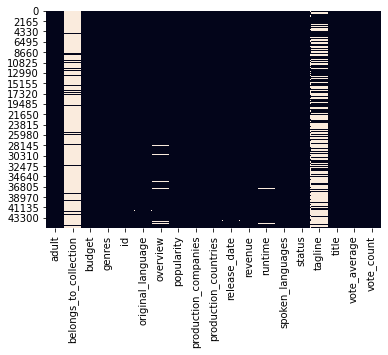

In [15]:
## As you can see almost all the values are NaN at 'belongs_to_collection' and at 'tagline'
# And instead of 'tagline' we could use 'overview'. So we drop these 2 columns.
sns.heatmap(movies.isnull(), cbar=False)